## Interpreting the amis data:

In [9]:
import csv
import numpy as np
from datetime import datetime

In [19]:
import os
import sys

In [103]:
dir_path="../amis/csvfiles"

In [2]:
file_path="../amis/wheatmultan.csv"

In [132]:
dates=[]
values=[]

In [133]:
all_files = os.listdir(dir_path)

In [134]:
for file_path in all_files:
    with open(os.path.join(dir_path,file_path), newline='',encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        info_line = next(reader)
        for _ in range(4):
            next(reader)
        for row in reader:
            # Extract relevant columns
            if len(row)<3:
                break;
            date_str = row[1]
            value_str = row[2]
    
            # Check if both date and value are present
            if date_str and value_str:
                # Convert date string to a datetime object
                date = datetime.strptime(date_str, '%d %b %y')
                
                # Append date to the 'dates' list
                dates.append(date)
    
                # Append value to the 'values' list
                values.append(float(value_str))
    dates_array=np.array(dates)
    values_array=np.array(values)
    crop_name = info_line[0].lower().split()[0]
    print(crop_name)
    np.savez(f"../amis/numpy/{crop_name}_{info_line[1].lower()}.npz", values=values_array, dates=dates_array)

rice
sugar
rice
wheat
wheat
rice
rice
rice
wheat
wheat
sugar
rice
sugar
sugar
sugar
wheat


In [135]:
info_line

['Wheat', 'BahawalPur', '6/15/2012', '12/11/2023', 'Rs./100kg']

In [116]:
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    first_line=next(reader)
    print(first_line)

FileNotFoundError: [Errno 2] No such file or directory: 'wheatbhawalpur.csv'

In [136]:
numpy_file_dir = "../amis/numpy"

In [137]:
numpy_files = os.listdir(numpy_file_dir)

In [138]:
demo_file=numpy_files[0]
demo_file

'sugar_gujranwala.npz'

In [38]:
bhaw_wheat = np.load(os.path.join(numpy_file_dir,demo_file), allow_pickle=True)

In [30]:
bhaw_wheat['values'].shape

(57765,)

In [32]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 168.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:01010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.0 MB/s eta 0:00:00m eta 0:00:01:010:01


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [83]:
min_date = datetime(2010, 1, 1, 0, 0)

In [86]:
pickle_dest = "../amis/models/{}.pkl";

In [142]:
for eachfile in numpy_files:

    numfile = np.load(os.path.join(numpy_file_dir,eachfile), allow_pickle=True)
    
    dates=numfile['dates'][:-500]
    prices=numfile['values'][:-500]
    
    numeric_dates = (dates - min_date).astype('timedelta64[D]').astype(int).reshape(-1, 1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(numeric_dates, prices, test_size=0.2, random_state=42)
    
    # Create a polynomial regression model
    degree = 3 # You can adjust the degree of the polynomial
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    with open(pickle_dest.format(eachfile[:-4]), 'wb') as file:
        pickle.dump(model,file)

    plt.scatter(numeric_dates, prices, color='black', label='Actual Prices')
    plt.plot(numeric_dates, model.predict(numeric_dates), color='blue', label=f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Numeric Dates')
    plt.ylabel('Prices')
    plt.legend()
    plt.savefig(f"../amis/plots/{eachfile[:-4]}.png")
    plt.close()
    
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)


Mean Squared Error: 15206504.519263133
R-squared: 0.4327643222422012
Mean Squared Error: 13293519.029825274
R-squared: 0.40956278096228826
Mean Squared Error: 13012344.594515193
R-squared: 0.4403722270872058
Mean Squared Error: 14729979.067273667
R-squared: 0.3850078242834237
Mean Squared Error: 14720053.162784662
R-squared: 0.4649756467244168
Mean Squared Error: 13007758.15527818
R-squared: 0.43060480129175194
Mean Squared Error: 957325.2465605554
R-squared: 0.6078407131168557
Mean Squared Error: 15343618.740183366
R-squared: 0.46608896513270615
Mean Squared Error: 13260325.838639243
R-squared: 0.5271524707086678
Mean Squared Error: 3188290.9893065137
R-squared: 0.5880606093907295
Mean Squared Error: 14330615.792587724
R-squared: 0.5105351870020297
Mean Squared Error: 13678833.520366507
R-squared: 0.4414846789490534
Mean Squared Error: 14707878.374338772
R-squared: 0.40099676590017186
Mean Squared Error: 5438948.795596619
R-squared: 0.34831272459868334
Mean Squared Error: 12357233.095

In [77]:
import matplotlib.pyplot as plt

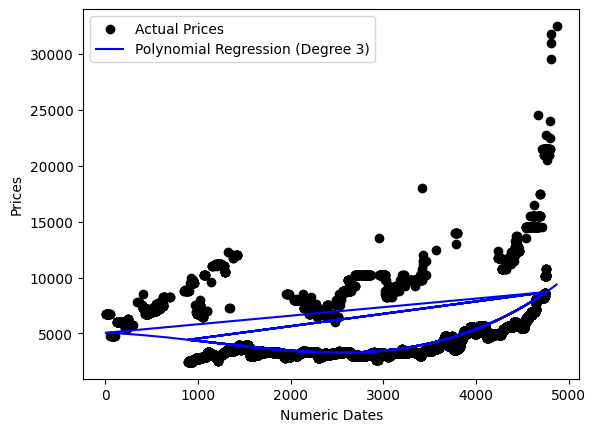

In [100]:
# Visualize the regression line
plt.scatter(numeric_dates, prices, color='black', label='Actual Prices')
plt.plot(numeric_dates, model.predict(numeric_dates), color='blue', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Numeric Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()